<a href="https://colab.research.google.com/github/miguelorduna360-alt/Debt/blob/main/GlobalDebtDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Research Question:

> To what extent was the economic performance of the United States throughout the 2008 recession an indicator of change in terms of total private debt, household debt and NonFinancial Corporation Debt for European and Asian economies?



In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score

Data Exploration: DEBT

This is where I ran the url for the datases via github as a csv file, then I called debt_df to view the datasets fully for any NaN values, I have the USA alomg with three European countries and one Asian Country.

In [2]:
url = 'https://raw.githubusercontent.com/miguelorduna360-alt/DebtData/refs/heads/main/USADataSet%20-%20GlobalDebtDatabaseForUS.xlsx%20-%20Data%20(2).csv'
debtUSA_df = pd.read_csv(url)
debtUSA_df

,Year,"Total private debt, all instruments","Total private debt, loans and debt securities","Household debt, all instruments","Household debt, loans and debt securities","Non-financial corporations debt, all instruments","Non-financial corporations debt, loans and debt securities",General government debt,Central government debt,Nominal gross domestic product
0,1950,75.83,55.31,25.48,24.80,50.34,30.51,83.13,78.20,301.78
1,1951,72.69,53.66,24.52,23.91,48.17,29.75,72.96,68.20,348.99
2,1952,88.24,56.56,26.60,25.98,61.64,30.58,72.53,66.34,368.03
3,1953,88.05,58.02,28.43,27.79,59.62,30.22,71.75,64.60,389.15
4,1954,106.06,62.57,31.54,30.86,74.52,31.71,73.57,64.96,390.28
...,...,...,...,...,...,...,...,...,...,...
69,2019,229.96,153.39,77.05,75.11,152.91,78.28,108.71,92.39,21539.98
70,2020,238.75,164.80,80.48,78.46,158.28,86.33,132.93,116.88,21354.13
71,2021,229.76,160.50,79.51,77.75,150.25,82.76,125.25,111.90,23681.18
72,2022,227.77,156.12,76.63,75.47,151.14,80.65,119.52,107.54,26006.90


In [3]:
url = 'https://raw.githubusercontent.com/miguelorduna360-alt/DebtData/refs/heads/main/UK%20Dataset%20-%20GlobalDebtDatabaseForUK.xlsx%20-%20Data.csv'
debtUK_df = pd.read_csv(url)
debtUK_df

,Year,"Total private debt, all instruments","Total private debt, loans and debt securities","Household debt, all instruments","Household debt, loans and debt securities","Non-financial corporations debt, all instruments","Non-financial corporations debt, loans and debt securities",General government debt,Central government debt,Nominal gross domestic product
0,1950,NaN,NaN,NaN,NaN,NaN,NaN,179.90,NaN,14.34
1,1951,NaN,NaN,NaN,NaN,NaN,NaN,162.18,NaN,15.98
2,1952,NaN,NaN,NaN,NaN,NaN,NaN,150.15,NaN,17.24
3,1953,NaN,NaN,NaN,NaN,NaN,NaN,140.87,NaN,18.49
4,1954,NaN,NaN,NaN,NaN,NaN,NaN,135.84,NaN,19.57
...,...,...,...,...,...,...,...,...,...,...
69,2019,200.10,156.99,91.00,85.70,109.10,71.28,85.66,84.69,2233.92
70,2020,226.79,176.68,99.39,92.91,127.40,83.78,105.84,104.85,2103.49
71,2021,199.81,163.85,92.82,87.94,106.99,75.91,105.14,104.31,2285.40
72,2022,170.77,148.45,87.31,82.46,83.46,65.99,99.62,99.01,2526.43


In [4]:
url = 'https://raw.githubusercontent.com/miguelorduna360-alt/DebtData/refs/heads/main/CN%20Dataset%20-%20GlobalDebtDatabaseForChina.xlsx%20-%20Data.csv'
debtCN_df = pd.read_csv(url)
debtCN_df

,Year,"Total private debt, all instruments","Total private debt, loans and debt securities","Household debt, all instruments","Household debt, loans and debt securities","Non-financial corporations debt, all instruments","Non-financial corporations debt, loans and debt securities",General government debt,Central government debt,Nominal gross domestic product
0,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.51
3,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.30
4,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.13
...,...,...,...,...,...,...,...,...,...,...
69,2019,NaN,186.37,NaN,55.85,NaN,130.52,60.40,NaN,99070.84
70,2020,NaN,198.69,NaN,61.61,NaN,137.08,70.16,NaN,102562.84
71,2021,NaN,192.81,NaN,62.09,NaN,130.72,71.85,NaN,114528.29
72,2022,NaN,198.53,NaN,62.32,NaN,136.21,77.39,NaN,120247.10


In [5]:
url = 'https://raw.githubusercontent.com/miguelorduna360-alt/DebtData/refs/heads/main/JP%20Dataset%20-%20GlobalDebtDatabaseForUS.xlsx%20-%20Data%20(2).csv'
debtJP_df = pd.read_csv(url)
debtJP_df

,Year,"Total private debt, all instruments","Total private debt, loans and debt securities","Household debt, all instruments","Household debt, loans and debt securities","Non-financial corporations debt, all instruments","Non-financial corporations debt, loans and debt securities",General government debt,Central government debt,Nominal gross domestic product
0,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4167.77
1,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5772.23
2,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6516.18
3,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7354.44
4,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8166.46
...,...,...,...,...,...,...,...,...,...,...
69,2019,205.88,164.33,64.79,62.54,141.08,101.79,236.38,197.46,557910.90
70,2020,222.39,183.25,69.52,67.49,152.87,115.76,258.37,205.56,539648.80
71,2021,224.51,183.62,69.49,67.65,155.02,115.97,253.65,214.10,553150.80
72,2022,229.43,185.53,70.00,67.85,159.44,117.68,256.30,214.26,561751.30


In [6]:
url = 'https://raw.githubusercontent.com/miguelorduna360-alt/DebtData/refs/heads/main/ES%20Dataset%20-%20GlobalDebtDatabaseForUS.xlsx%20-%20Data%20(1).csv'
debtES_df = pd.read_csv(url)
debtES_df

,Year,"Total private debt, all instruments","Total private debt, loans and debt securities","Household debt, all instruments","Household debt, loans and debt securities","Non-financial corporations debt, all instruments","Non-financial corporations debt, loans and debt securities",General government debt,Central government debt,Nominal gross domestic product
0,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.05,1.66
1,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.81,2.09
2,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.76,2.16
3,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.15,2.11
4,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.80,2.45
...,...,...,...,...,...,...,...,...,...,...
69,2019,195.47,148.68,60.43,56.44,135.04,92.24,97.58,87.40,1253.71
70,2020,217.80,168.68,66.45,62.02,151.34,106.66,119.18,106.85,1129.21
71,2021,205.26,159.17,61.50,57.00,143.77,102.17,115.59,103.62,1235.47
72,2022,184.87,141.56,55.65,51.22,129.22,90.33,109.40,98.93,1373.63


In [7]:
url = 'https://raw.githubusercontent.com/miguelorduna360-alt/DebtData/refs/heads/main/DK%20Dataset%20-%20GlobalDebtDatabaseForDK.xlsx%20-%20Data.csv'
debtDK_df = pd.read_csv(url)
debtDK_df

,Year,"Total private debt, all instruments","Total private debt, loans and debt securities","Household debt, all instruments","Household debt, loans and debt securities","Non-financial corporations debt, all instruments","Non-financial corporations debt, loans and debt securities",General government debt,Central government debt,Nominal gross domestic product
0,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.32,22.72
1,1951,NaN,85.40,NaN,NaN,NaN,NaN,NaN,41.07,24.16
2,1952,NaN,82.95,NaN,NaN,NaN,NaN,NaN,38.71,25.86
3,1953,NaN,81.07,NaN,NaN,NaN,NaN,NaN,36.12,27.82
4,1954,NaN,81.20,NaN,NaN,NaN,NaN,NaN,29.38,29.15
...,...,...,...,...,...,...,...,...,...,...
69,2019,299.75,248.13,116.59,110.93,183.16,137.20,33.79,26.59,2303.64
70,2020,288.23,237.38,118.85,111.72,169.38,125.67,42.17,34.66,2326.59
71,2021,268.29,227.49,107.42,101.42,160.87,126.07,35.78,28.32,2567.52
72,2022,258.09,217.29,88.75,84.46,169.34,132.83,29.70,22.67,2844.23


In [8]:
url = 'https://raw.githubusercontent.com/miguelorduna360-alt/DebtData/refs/heads/main/THA%20Dataset%20-%20GlobalDebtDatabaseForThailand.xlsx%20-%20Data.csv'
debtTHA_df = pd.read_csv(url)
debtTHA_df

,Year,"Total private debt, all instruments","Total private debt, loans and debt securities","Household debt, all instruments","Household debt, loans and debt securities","Non-financial corporations debt, all instruments","Non-financial corporations debt, loans and debt securities",General government debt,Central government debt,Nominal gross domestic product
0,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.55,26.22
1,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.89,29.16
2,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.16,31.76
3,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.83,33.01
4,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.52,35.26
...,...,...,...,...,...,...,...,...,...,...
69,2019,NaN,159.51,NaN,79.87,NaN,79.64,34.05,34.00,16889.17
70,2020,NaN,180.91,NaN,89.58,NaN,91.34,45.10,45.05,15661.29
71,2021,NaN,184.27,NaN,90.04,NaN,94.22,52.77,52.73,16188.61
72,2022,NaN,178.71,NaN,87.01,NaN,91.70,53.74,53.53,17378.02


In [9]:
url = 'https://raw.githubusercontent.com/miguelorduna360-alt/DebtData/refs/heads/main/NL%20Dataset%20-%20GlobalDebtDatabaseForUS.xlsx%20-%20Data.csv'
debtNL_df = pd.read_csv(url)
debtNL_df

,Year,"Total private debt, all instruments","Total private debt, loans and debt securities","Household debt, all instruments","Household debt, loans and debt securities","Non-financial corporations debt, all instruments","Non-financial corporations debt, loans and debt securities",General government debt,Central government debt,Nominal gross domestic product
0,1950,NaN,NaN,NaN,NaN,NaN,NaN,143.73,NaN,9.05
1,1951,NaN,NaN,NaN,NaN,NaN,NaN,123.93,NaN,10.33
2,1952,NaN,NaN,NaN,NaN,NaN,NaN,111.85,NaN,10.78
3,1953,NaN,NaN,NaN,NaN,NaN,NaN,106.24,NaN,11.47
4,1954,NaN,NaN,NaN,NaN,NaN,NaN,92.86,NaN,12.81
...,...,...,...,...,...,...,...,...,...,...
69,2019,350.57,244.66,113.34,98.77,237.22,145.89,47.58,NaN,829.77
70,2020,367.68,246.67,118.27,102.39,249.41,144.28,53.34,NaN,816.46
71,2021,353.88,234.15,112.42,97.62,241.46,136.54,50.44,NaN,891.55
72,2022,333.23,216.77,105.15,90.12,228.07,126.64,48.35,NaN,993.82


In [10]:
url = 'https://raw.githubusercontent.com/miguelorduna360-alt/DebtData/refs/heads/main/SE%20Dataset%20-%20GlobalDebtDatabaseForGER.xlsx%20-%20Data%20(1).csv'
debtSE_df = pd.read_csv(url)
debtSE_df

,Year,"Total private debt, all instruments","Total private debt, loans and debt securities","Household debt, all instruments","Household debt, loans and debt securities","Non-financial corporations debt, all instruments","Non-financial corporations debt, loans and debt securities",General government debt,Central government debt,Nominal gross domestic product
0,1950,NaN,NaN,NaN,37.31,NaN,NaN,NaN,36.11,35.68
1,1951,NaN,NaN,NaN,32.64,NaN,NaN,NaN,30.04,43.95
2,1952,NaN,NaN,NaN,32.45,NaN,NaN,NaN,27.42,47.79
3,1953,NaN,NaN,NaN,34.85,NaN,NaN,NaN,27.20,49.43
4,1954,NaN,NaN,NaN,36.24,NaN,NaN,NaN,27.70,52.36
...,...,...,...,...,...,...,...,...,...,...
69,2019,264.66,225.15,92.02,88.51,172.63,136.64,35.70,36.63,5033.44
70,2020,279.38,238.95,97.78,93.65,181.60,145.30,40.31,42.25,5020.98
71,2021,283.93,242.23,95.94,91.86,188.00,150.37,36.83,38.98,5464.88
72,2022,288.19,239.90,92.86,87.54,195.32,152.36,33.75,37.42,5865.21


In [11]:
url = 'https://raw.githubusercontent.com/miguelorduna360-alt/DebtData/refs/heads/main/IN%20Dataset%20-%20GlobalDebtDatabaseForIndia.xlsx%20-%20Data.csv'
debtIN_df = pd.read_csv(url)
debtIN_df

,Year,"Total private debt, all instruments","Total private debt, loans and debt securities","Household debt, all instruments","Household debt, loans and debt securities","Non-financial corporations debt, all instruments","Non-financial corporations debt, loans and debt securities",General government debt,Central government debt,Nominal gross domestic product
0,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.13,128.04
1,1951,NaN,16.82,NaN,NaN,NaN,NaN,NaN,25.18,135.08
2,1952,NaN,16.76,NaN,NaN,NaN,NaN,NaN,26.39,132.06
3,1953,NaN,16.21,NaN,NaN,NaN,NaN,NaN,24.65,139.65
4,1954,NaN,18.65,NaN,NaN,NaN,NaN,NaN,24.86,130.45
...,...,...,...,...,...,...,...,...,...,...
69,2019,NaN,94.54,NaN,36.00,NaN,58.54,75.04,46.70,201035.90
70,2020,NaN,101.60,NaN,40.43,NaN,61.18,88.43,55.03,198541.00
71,2021,NaN,90.60,NaN,36.05,NaN,54.55,83.49,54.42,235974.00
72,2022,NaN,93.80,NaN,37.32,NaN,56.48,81.68,54.36,269496.50


In [12]:
url = 'https://raw.githubusercontent.com/miguelorduna360-alt/DebtData/refs/heads/main/HK%20Dataset%20-%20GlobalDebtDatabaseForHongKong.xlsx%20-%20Data.csv'
debtHK_df = pd.read_csv(url)
debtHK_df

,Year,"Total private debt, all instruments","Total private debt, loans and debt securities","Household debt, all instruments","Household debt, loans and debt securities","Non-financial corporations debt, all instruments","Non-financial corporations debt, loans and debt securities",General government debt,Central government debt,Nominal gross domestic product
0,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
69,2019,NaN,349.45,NaN,81.68,NaN,267.78,NaN,6.17,2845.02
70,2020,NaN,384.04,NaN,91.61,NaN,292.43,NaN,8.36,2675.79
71,2021,NaN,368.81,NaN,93.14,NaN,275.67,NaN,10.73,2867.97
72,2022,NaN,374.05,NaN,96.36,NaN,277.69,NaN,14.60,2808.98


In [13]:
url = 'https://raw.githubusercontent.com/miguelorduna360-alt/DebtData/refs/heads/main/GER%20dataset%20-%20GlobalDebtDatabaseForGER.xlsx%20-%20Data.csv'
debtGER_df = pd.read_csv(url)
debtGER_df

,Year,"Total private debt, all instruments","Total private debt, loans and debt securities","Household debt, all instruments","Household debt, loans and debt securities","Non-financial corporations debt, all instruments","Non-financial corporations debt, loans and debt securities",General government debt,Central government debt,Nominal gross domestic product
0,1950,NaN,33.38,NaN,NaN,NaN,NaN,18.81,NaN,56.08
1,1951,NaN,35.19,NaN,NaN,NaN,NaN,16.69,NaN,68.53
2,1952,NaN,40.11,NaN,NaN,NaN,NaN,15.71,NaN,78.28
3,1953,NaN,46.79,NaN,NaN,NaN,NaN,20.56,NaN,84.30
4,1954,NaN,53.95,NaN,NaN,NaN,NaN,21.81,NaN,90.72
...,...,...,...,...,...,...,...,...,...,...
69,2019,164.81,120.00,53.10,52.55,111.72,67.45,58.56,37.13,3534.88
70,2020,175.07,129.27,56.84,56.28,118.23,73.00,67.86,44.25,3449.62
71,2021,178.00,128.11,56.10,55.55,121.90,72.56,67.88,45.68,3676.46
72,2022,173.83,125.39,54.47,53.88,119.36,71.51,64.79,44.92,3953.85


In the first line of code I reorginzed the values, from numerical Strings to Floats, next I also did reorginzation with the NaN values, giving them 0. After That I dropped the two columns that had no data, and kept inplace the ones with values, otherwise known as True. Then I

In [14]:
debtUSA_df = debtUSA_df.apply(pd.to_numeric, errors='coerce')
debtUSA_df.fillna(0, inplace=True)


debtUK_df = debtUK_df.apply(pd.to_numeric, errors='coerce')
debtUK_df.fillna(0, inplace=True)


debtCN_df = debtCN_df.apply(pd.to_numeric, errors='coerce')
debtCN_df.fillna(0, inplace=True)


debtJP_df = debtJP_df.apply(pd.to_numeric, errors='coerce')
debtJP_df.fillna(0, inplace=True)

debtES_df = debtES_df.apply(pd.to_numeric, errors='coerce')
debtES_df.fillna(0, inplace=True)

debtDK_df = debtDK_df.apply(pd.to_numeric, errors='coerce')
debtDK_df.fillna(0, inplace=True)

debtHK_df = debtHK_df.apply(pd.to_numeric, errors='coerce')
debtHK_df.fillna(0, inplace=True)

debtNL_df = debtNL_df.apply(pd.to_numeric, errors='coerce')
debtNL_df.fillna(0, inplace=True)

debtIN_df = debtIN_df.apply(pd.to_numeric, errors='coerce')
debtIN_df.fillna(0, inplace=True)

debtTHA_df = debtTHA_df.apply(pd.to_numeric, errors='coerce')
debtTHA_df.fillna(0, inplace=True)

debtGER_df = debtGER_df.apply(pd.to_numeric, errors='coerce')
debtGER_df.fillna(0, inplace=True)

debtSE_df = debtSE_df.apply(pd.to_numeric, errors='coerce')
debtSE_df.fillna(0, inplace=True)



Here I have made a new column for Countries in their Initial Form as well as combining every dataset from every country into a Combinded version with the countries I chose. Then I filtered with setting conditionals and then have a finalized, perfect for the 2008 recession timeline.

In [15]:
debtUK_df['Country'] = 'UK'
debtCN_df['Country'] = 'CN'
debtJP_df['Country'] = 'JP'
debtES_df['Country'] = 'ES'
debtSE_df['Country'] = 'SE'
debtDK_df['Country'] = 'DK'
debtHK_df['Country'] = 'HK'
debtNL_df['Country'] = 'NL'
debtIN_df['Country'] = 'IN'
debtTHA_df['Country'] = 'THA'
debtGER_df['Country'] = 'GER'

combinded_df = pd.concat([debtUK_df, debtCN_df, debtJP_df, debtES_df, debtDK_df, debtHK_df, debtNL_df, debtIN_df, debtTHA_df, debtGER_df, debtSE_df])

filteredDebt_df = combinded_df[(combinded_df['Year'] >= 2006) & (combinded_df['Year'] <= 2012)]
filteredDebt_df

,Year,"Total private debt, all instruments","Total private debt, loans and debt securities","Household debt, all instruments","Household debt, loans and debt securities","Non-financial corporations debt, all instruments","Non-financial corporations debt, loans and debt securities",General government debt,Central government debt,Nominal gross domestic product,Country
56,2006,223.00,172.19,103.98,91.59,119.03,80.60,42.06,41.12,1472.04,UK
57,2007,227.38,175.99,105.68,94.75,121.70,81.24,43.17,42.19,1544.64,UK
58,2008,240.96,185.28,104.86,95.29,136.10,89.99,50.83,49.95,1593.60,UK
59,2009,247.24,185.22,107.46,98.07,139.77,87.15,64.92,64.05,1548.80,UK
60,2010,235.63,177.05,103.20,94.95,132.43,82.10,75.86,74.89,1608.55,UK
...,...,...,...,...,...,...,...,...,...,...,...
58,2008,229.85,188.05,73.26,68.25,156.60,119.80,37.74,41.14,3391.89,SE
59,2009,241.52,201.21,80.36,75.59,161.16,125.63,40.95,44.63,3324.15,SE
60,2010,230.18,189.32,81.07,75.92,149.11,113.40,38.30,41.19,3551.53,SE
61,2011,232.76,192.89,81.20,76.50,151.57,116.39,37.38,39.99,3704.84,SE


Then I will have made a filtered version of the DataFrame for the USA to compare with the others on the filteredDebt Df area. The filtering is during the time of the 2008 Recession, The reason for 2007 to be included is due to it starting in December 2007.

In [16]:
filtered_debtUSA_df = debtUSA_df[(debtUSA_df['Year'] >= 2006) & (debtUSA_df['Year'] <= 2012)]
filtered_debtUSA_df['Country'] = 'USA'

I will have displayed the USA version of the Debt sectors I have chosen for my research question. These will be based in 2007 to 2009, during the time of the Recession, to see how the USA changed throughout the Recession.

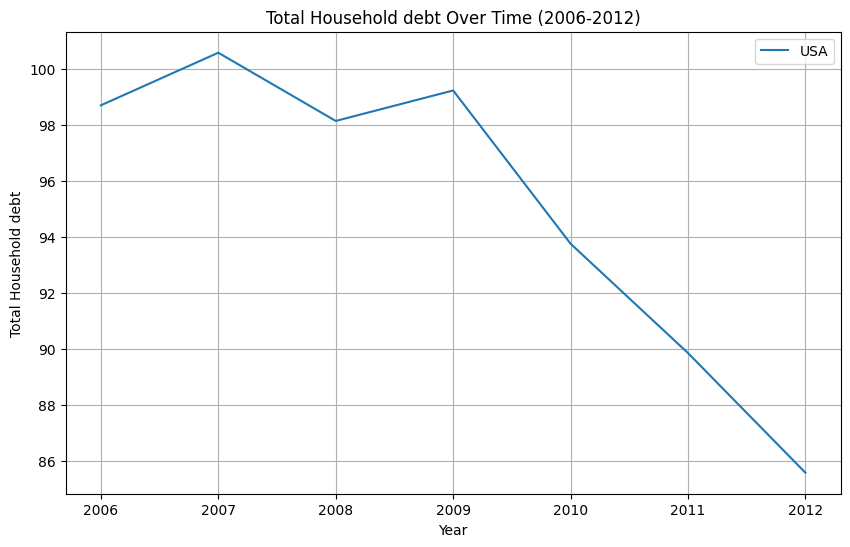

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(filtered_debtUSA_df['Year'], filtered_debtUSA_df['Household debt, all instruments'], label = 'USA')
plt.xlabel('Year')
plt.ylabel('Total Household debt')
plt.title('Total Household debt Over Time (2006-2012)')
plt.legend()
plt.grid(True)
plt.show()

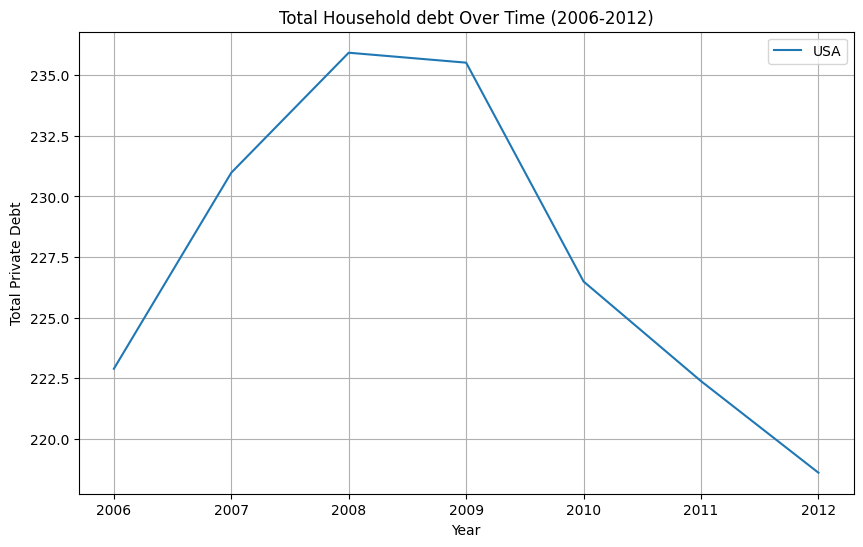

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(filtered_debtUSA_df['Year'], filtered_debtUSA_df['Total private debt, all instruments'], label = 'USA')
plt.xlabel('Year')
plt.ylabel('Total Private Debt')
plt.title('Total Household debt Over Time (2006-2012)')
plt.legend()
plt.grid(True)
plt.show()

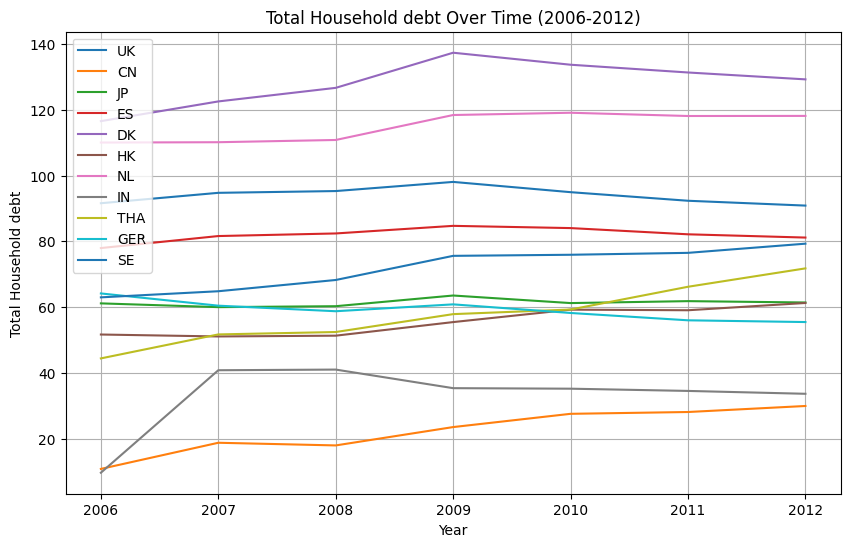

In [20]:
plt.figure(figsize=(10, 6))


for country in filteredDebt_df['Country'].unique():
    country_data = filteredDebt_df[filteredDebt_df['Country'] == country]
    plt.plot(country_data['Year'], country_data['Household debt, loans and debt securities'], label=country)


plt.xlabel('Year')
plt.ylabel('Total Household debt')
plt.title('Total Household debt Over Time (2006-2012)')
plt.legend()
plt.grid(True)
plt.show()

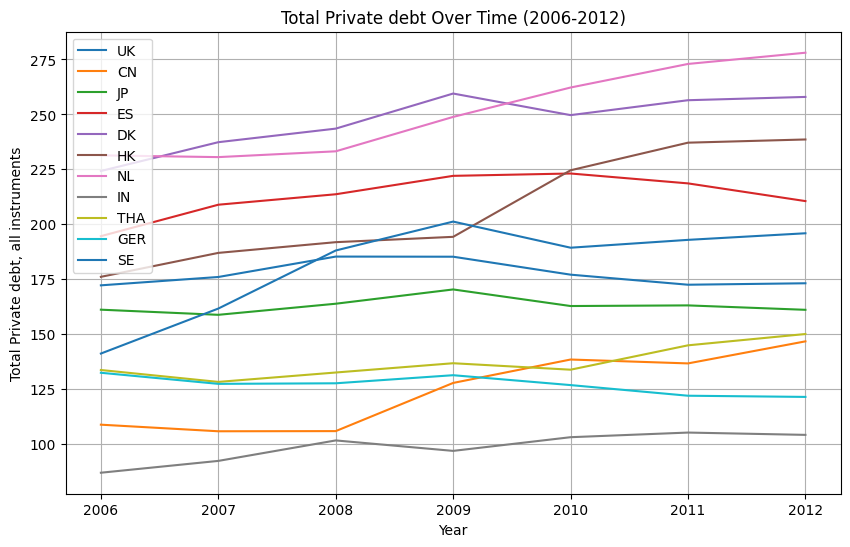

In [21]:
plt.figure(figsize=(10, 6))

for country in filteredDebt_df['Country'].unique():
    country_data = filteredDebt_df[filteredDebt_df['Country'] == country]
    plt.plot(country_data['Year'], country_data['Total private debt, loans and debt securities'], label=country)


plt.xlabel('Year')
plt.ylabel('Total Private debt, all instruments')
plt.title('Total Private debt Over Time (2006-2012)')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
finalizedDebt_df = pd.concat([filteredDebt_df, filtered_debtUSA_df])

In [23]:
finalizedDebt_df.describe()

,Year,"Total private debt, all instruments","Total private debt, loans and debt securities","Household debt, all instruments","Household debt, loans and debt securities","Non-financial corporations debt, all instruments","Non-financial corporations debt, loans and debt securities",General government debt,Central government debt,Nominal gross domestic product
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,2009.000000,161.340119,174.191429,61.681190,72.762619,99.659286,101.429405,61.097976,43.730000,54748.027024
std,2.012012,121.140569,48.515595,48.367855,30.652344,74.670386,29.492701,48.265845,40.196627,140995.468218
min,2006.000000,0.000000,86.890000,0.000000,9.650000,0.000000,51.470000,0.000000,0.000000,587.440000
25%,2007.000000,0.000000,133.755000,0.000000,55.457500,0.000000,76.050000,33.882500,18.185000,1657.127500
50%,2009.000000,207.905000,170.540000,67.270000,65.510000,132.630000,99.805000,48.430000,40.830000,2958.945000
75%,2011.000000,248.155000,211.317500,99.545000,94.800000,152.390000,122.207500,74.520000,50.017500,17680.400000
max,2012.000000,372.740000,278.080000,135.950000,137.350000,238.790000,178.080000,226.090000,176.720000,539281.700000


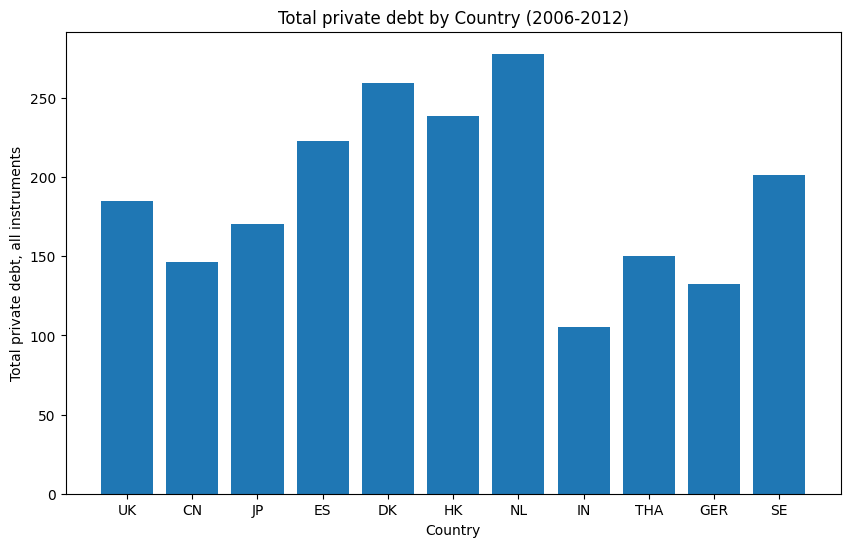

In [ ]:
x = filteredDebt_df["Country"]
y = filteredDebt_df["Total private debt, loans and debt securities"]

plt.figure(figsize=(10, 6))
plt.bar(x, y)

plt.title("Total private debt by Country (2006-2012)")
plt.xlabel("Country")
plt.ylabel("Total private debt, all instruments")

plt.show()

In [24]:
from sklearn.linear_model import LinearRegression

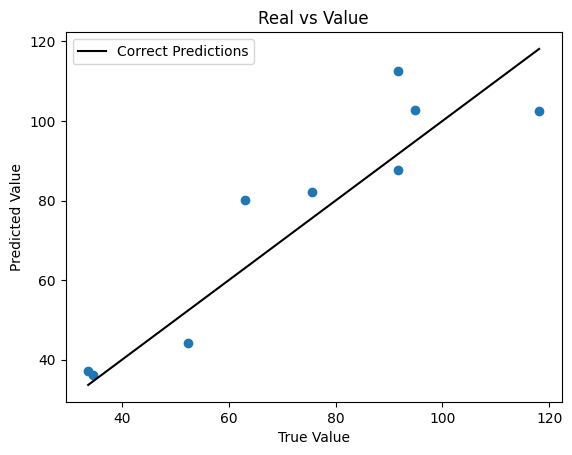

R2 Score: 0.8253476036971166
MSE: 131.42487167873222
MAE: 9.532068176515882


In [28]:
x = finalizedDebt_df.drop(columns = ['Year', 'Country', 'Household debt, loans and debt securities', 'Total private debt, loans and debt securities', 'Non-financial corporations debt, loans and debt securities'])
y = finalizedDebt_df['Household debt, loans and debt securities']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

model_1 = LinearRegression()
model_1.fit(X_train, y_train)
predictions = model_1.predict(X_test)

plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black', label='Correct Predictions')


plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Real vs Value')
plt.legend()

plt.show()

print("R2 Score:", r2_score(y_test, predictions))

print("MSE:", mean_squared_error(y_test, predictions))

print("MAE:", mean_absolute_error(y_test, predictions))

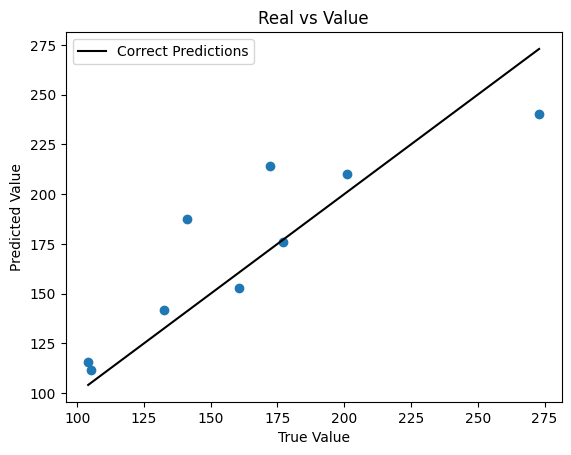

R2 Score: 0.7551889075098774
MSE: 600.0391259011702
MAE: 18.455758716784505


In [29]:
x = finalizedDebt_df.drop(columns = ['Year', 'Country', 'Household debt, loans and debt securities', 'Total private debt, loans and debt securities', 'Non-financial corporations debt, loans and debt securities'])
y = finalizedDebt_df['Total private debt, loans and debt securities']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

model_1 = LinearRegression()
model_1.fit(X_train, y_train)
predictions = model_1.predict(X_test)

plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black', label='Correct Predictions')


plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Real vs Value')
plt.legend()

plt.show()

print("R2 Score:", r2_score(y_test, predictions))

print("MSE:", mean_squared_error(y_test, predictions))

print("MAE:", mean_absolute_error(y_test, predictions))

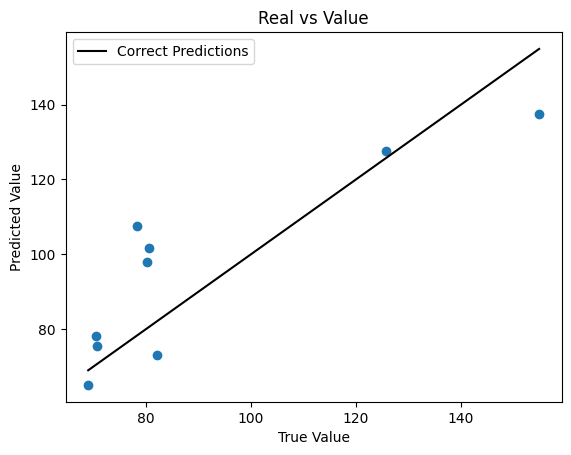

R2 Score: 0.7029826384107822
MSE: 233.17164774186418
MAE: 12.533034759410999


In [30]:
x = finalizedDebt_df.drop(columns = ['Year', 'Country', 'Household debt, loans and debt securities', 'Total private debt, loans and debt securities', 'Non-financial corporations debt, loans and debt securities'])
y = finalizedDebt_df['Non-financial corporations debt, loans and debt securities']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

model_1 = LinearRegression()
model_1.fit(X_train, y_train)
predictions = model_1.predict(X_test)

plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black', label='Correct Predictions')


plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Real vs Value')
plt.legend()

plt.show()

print("R2 Score:", r2_score(y_test, predictions))

print("MSE:", mean_squared_error(y_test, predictions))

print("MAE:", mean_absolute_error(y_test, predictions))

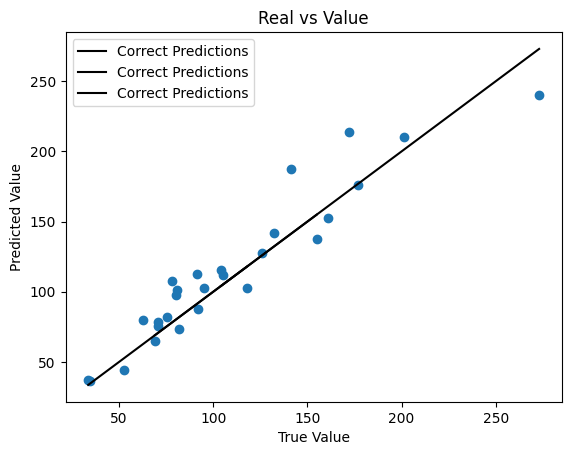

R2 Score: 0.7611730498727179
MSE: 321.5452151071586
MAE: 13.50695388423312


In [31]:
x = finalizedDebt_df.drop(columns = ['Year', 'Country', 'Household debt, loans and debt securities', 'Total private debt, loans and debt securities', 'Non-financial corporations debt, loans and debt securities'])
y = finalizedDebt_df[['Non-financial corporations debt, loans and debt securities', 'Household debt, loans and debt securities', 'Total private debt, loans and debt securities']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

model_1 = LinearRegression()
model_1.fit(X_train, y_train)
predictions = model_1.predict(X_test)

plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black', label='Correct Predictions')


plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Real vs Value')
plt.legend()

plt.show()

print("R2 Score:", r2_score(y_test, predictions))

print("MSE:", mean_squared_error(y_test, predictions))

print("MAE:", mean_absolute_error(y_test, predictions))


T-test results for each coefficient:
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0           129.8461    830.625      0.156      0.876   -1531.092    1790.784
c1          -128.7721    830.644     -0.155      0.877   -1789.747    1532.203
c2          -130.0716    830.615     -0.157      0.876   -1790.989    1530.846
c3             0.3010      0.178      1.687      0.097      -0.056       0.658
c4             0.1344      0.196      0.686      0.495      -0.257       0.526
c5         -9.813e-05   4.06e-05     -2.419      0.019      -0.000    -1.7e-05
                                            OLS Regression Results                                            
Dep. Variable:     Household debt, loans and debt securities   R-squared (uncentered):                   0.913
Model:                       

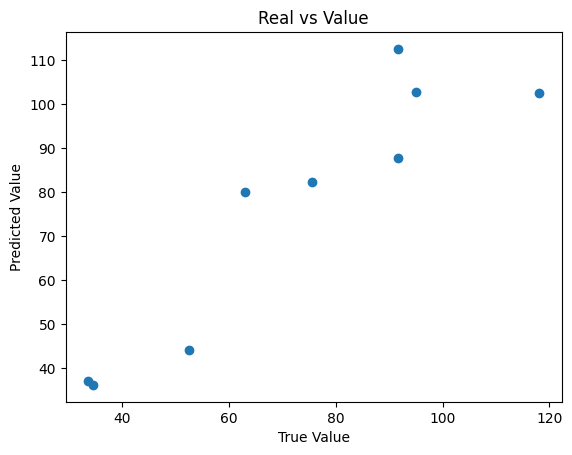

In [ ]:
import statsmodels.api as sm

ols_model = sm.OLS(y_train, X_train).fit()
print("\nT-test results for each coefficient:")
print(ols_model.t_test(np.identity(len(ols_model.params))))
print(ols_model.summary())
plt.scatter(y_test, predictions)
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Real vs Value')
plt.show()

In [36]:
from scipy.stats import levene

In [37]:
usa_values = filtered_debtUSA_df[['Non-financial corporations debt, loans and debt securities', 'Household debt, loans and debt securities', 'Total private debt, loans and debt securities']]
foreign_values = filteredDebt_df[['Non-financial corporations debt, loans and debt securities', 'Household debt, loans and debt securities', 'Total private debt, loans and debt securities']]

stats, p = levene(usa_values, foreign_values)

print(f"Levene's test stat: {stats}")
print(f"p-value: {p}")

Levene's test stat: [13.64058444  6.4158444  12.43589031]
p-value: [0.00039785 0.01321644 0.0006926 ]
